# Introduction

**Social Network Analysis** is the study of network behavior in social structures by leveraging the concepts in Graph Theory and Psychology. It is becoming popular in the recent times due to increasing social media usage and its applications in targeted advertisements, truth index of social posts, friendship recommendation, identification of key people and even in preventing epidemics!
  
  In this tutorial, we will see the social network analysis on GitHub connections between people and the repositories.
  
  Before getting into the tutorial, get motivated by this SNA 101 video https://www.youtube.com/watch?v=tbRF_ELh0Nc by Prof. Sudarshan.
  
  Resources: "Mining the Social Web", "Crowds, Networks and Markets", "NPTEL: Social Networks"
  
# Table of Contents
1. Generating GitHub Access Key
2. Getting Started With PyGitHub
3. Graph Collection<br>
    3.1. Case Study<br>
    3.2. Getting Dirty With NetworkX<br>
    3.3. Generating Interest Graph<br>
    3.4. Adding Social Links<br>
    3.5. Adding More Repositories<br>
    3.6. Snapshoting The Graph
4. Graph Exploration<br>
    4.1. Popular Repositories<br>
    4.2. Popular Languages<br>
    4.3. Connectivity<br>
    4.4. Popular Users<br>
    4.5. Community Detection<br>
    

# 1. Generating GitHub Access Key

Like other social networking sites Twitter and Facebook, GitHub also has **GitHub API v3** which could be used to used to extract much useful information. Information like followers, starred repositories, the programming language of the repositories and much more can be fetched using this API.

We need an access key to use this API. Follow the steps to get the access key.


1. Login github.com

2. Go to Settings -> Developer settings -> Personal access tokens
<br>
<img src="GitHubToken.png" width="700px" height="500px">
<br>
3. Click on Generate New Token
<br>
<img src="GithubToken1.png" width="700px" height="500px">
<br>
4. Check the repo box and fill the description.

5. Generate token

Don't forget to note down the token locally as it will not be accessible via the website next time.

# 2. Getting Started With PyGitHub

**PyGitHub** is the wrapper library over GitHub API v3 and it makes our job easier!

Install it using PIP.

In [ ]:
#pip install PyGitHub

It's simple to work with PyGitHub. Just create the instance and play with the objects!
Let's see a quick code:

In [1]:
from github import Github

USER = "GokulKarthik"
PASSWD = "gh.gokul98"
g = Github(USER, PASSWD)

for repo in g.get_user().get_repos():
    print repo.name

Applied-Text-Mining-in-Python
Applied_Data_Science_with_Python_UMich
coursera-ml
DataEngineering-SIG
datasciencecoursera
datasharing
Infinity-17-NLP_Workshop
interview-guide
Mini-Projects
NPTEL-SocialNetworks
python-for-competitive-programming
Python-for-Data-Science-and-Machine-Learning-Bootcamp---Udemy
R-PAD
rosetta
Social-Networks
TCE-NSS-Website


Creating the instance with the user credentials allow us to access his/her information as above.

# 3. Graph Collection

## 3.1. Case Study : 
Throughout this tutorial, I am going to analyze the social network of data science learners in GitHub.

But how do we collect the graph? In this <a src="https://www.youtube.com/watch?v=bXYVCdUvjeI&index=10&list=PL3DBHamkNmfcv11sQwQj1fCFkMbEQIAWY">NPTEL video</a>, Prof. Sudarshan beautifully explains the concept of "Collecting Web Graph by random walk".

GitHub is a very large network and we need GPUs and graph database to work with such a large dataset. So we are going to take the sample network data of data science learners community.

Then comes another problem! From which node I have to start? The answer is 'any'. But if we start from the popular data science resource/tutorial repository, we can easily capture more information about the data science learning community. Google page rank suggested me to start with <a src="https://github.com/bulutyazilim/awesome-datascience">Awesome Datascience</a> github repository by Bulut Yazılım.


## 3.2. Getting Dirty With Networkx

NetworkX is the graph computing library in python. We can easily create the graph using networkX by reading graph files like gexf, gml, graphml, pajek net or by simply adding nodes and edges.

Install it using pip

In [ ]:
#pip install networkx

In [5]:
#importing the package
import networkx as nx

#Creating the NULL graph
G1 = nx.Graph()

#Adding the edges will automatically add the nodes
G1.add_edges_from([(1,2), (2,3), (3,4)])

#Visulazing using matplotlib
import matplotlib.pyplot as plt
nx.draw(G1, with_labels=True)
plt.show()

ImportError: cannot import name release

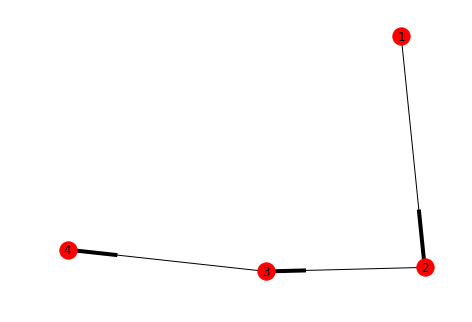

In [14]:
#Creating the directed graph
G2 = nx.DiGraph([(1,2), (2,3), (3,4)])
nx.draw(G2, with_labels=True)
plt.show()

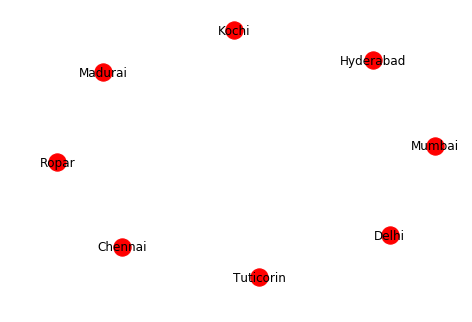

In [15]:
#modelling road network
G3 = nx.Graph()
cities = ['Delhi', 'Madurai', 'Mumbai', 'Tuticorin', 'Chennai', 'Kochi', 'Hyderabad', 'Ropar']
for city in cities:
    G3.add_node(city)
nx.draw(G3, with_labels=1)
plt.show()

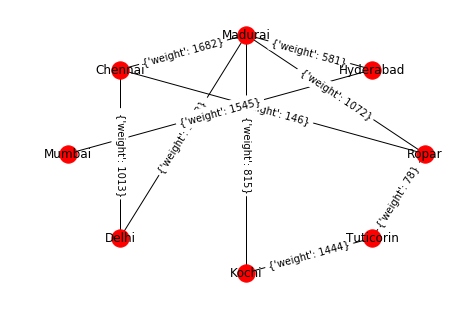

In [20]:
import random as rd 

#Addding 20 edges to the graph
while(G3.number_of_edges() != 10):
    city1 = rd.choice(G3.nodes())
    city2 = rd.choice(G3.nodes())
    #selecting random costs
    wt = rd.randint(20, 2000)
    if city1 != city2 and G3.has_edge(city1, city2) == 0:
        G3.add_edge(city1, city2, weight = wt)

pos = nx.circular_layout(G3)
nx.draw(G3, pos, with_labels=1)
nx.draw_networkx_edge_labels(G3, pos)
plt.show()

In [23]:
# Getting the shortest path 
print nx.dijkstra_path(G3, 'Mumbai', 'Tuticorin')

['Mumbai', 'Hyderabad', 'Madurai', 'Ropar', 'Tuticorin']


## 3.3. Generating Interest Graph

The interest graph is generated by making connections to the object which people are interested in. Here objects are the repositories. As I already stated let us build a star graph by making edges to the repository "AwesomeDataScience" with the people who starred it. Its schema is displayed below.

<img src="gs_1.png" alt="Graph Schema 1"/>

In [1]:
# Finding the people who followed the "awesome-datascience" repository
from github import Github

ACCESS_TOKEN = 'cfda794b26e8ab9ec9c28fca61cce08c76417d7a'
gh = Github(ACCESS_TOKEN, per_page=100)
user = gh.get_user('bulutyazilim')
repo = user.get_repo('awesome-datascience')

stargazers = [stargazer for stargazer in repo.get_stargazers()]
print "Number of stargazers :", len(stargazers)

Number of stargazers : 4747


In [2]:
print stargazers[:15]

[NamedUser(login="sakkas45"), NamedUser(login="ogta"), NamedUser(login="necatikartal"), NamedUser(login="gwn"), NamedUser(login="musaulker"), NamedUser(login="bahattincinic"), NamedUser(login="mahammad"), NamedUser(login="kurtulusahmet"), NamedUser(login="onuryurtturk"), NamedUser(login="nicolasramy"), NamedUser(login="GarethLewin"), NamedUser(login="qs"), NamedUser(login="Jberlinsky"), NamedUser(login="jt6211"), NamedUser(login="erolrecep")]


In [3]:
# Creating an interest graph with stargazers
import networkx as nx

G = nx.DiGraph()
G.add_node(repo.name, type='repo', lang=repo.language, owner=user.login)

for stargazer in stargazers:
    G.add_node(stargazer.login, type='user')
    G.add_edge(stargazer.login, repo.name , type='starred')
    
print nx.info(G)

Name: 
Type: DiGraph
Number of nodes: 4748
Number of edges: 4747
Average in degree:   0.9998
Average out degree:   0.9998


## 3.4. Adding Social Links

The connections between the people in the graph can be established by extracting the followers. If a person follows
another person within this group, we add an edge.(Similar to a random walk) The schema for this graph is:

<img src="gs_2.png" alt="Graph Schema 2"/>

In [4]:
for i, stargazer in enumerate(stargazers[:500]):
    try:
        for follower in stargazer.get_followers():
            if follower.login in G:
                G.add_node(follower.login, type='user')
                G.add_edge(follower.login, stargazer.login, type='follows')
    except Exception: 
        print "Error in getting the followers of", stargazer.login

    print "Processed", i+1, " stargazers"
    print "Number of nodes and edges in the graph",G.number_of_nodes(), "and", G.number_of_edges()

Processed 1  stargazers
Number of nodes and edges in the graph 4748 and 4756
Processed 2  stargazers
Number of nodes and edges in the graph 4748 and 4775
Processed 3  stargazers
Number of nodes and edges in the graph 4748 and 4789
Processed 4  stargazers
Number of nodes and edges in the graph 4748 and 4790
Processed 5  stargazers
Number of nodes and edges in the graph 4748 and 4800
Processed 6  stargazers
Number of nodes and edges in the graph 4748 and 4823
Processed 7  stargazers
Number of nodes and edges in the graph 4748 and 4839
Processed 8  stargazers
Number of nodes and edges in the graph 4748 and 4852
Processed 9  stargazers
Number of nodes and edges in the graph 4748 and 4865
Processed 10  stargazers
Number of nodes and edges in the graph 4748 and 4866
Processed 11  stargazers
Number of nodes and edges in the graph 4748 and 4866
Processed 12  stargazers
Number of nodes and edges in the graph 4748 and 4868
Processed 13  stargazers
Number of nodes and edges in the graph 4748 and 

Note: As it is a very time consuming process, I have limited the number of stargazers to process.

In [5]:
print nx.info(G)

Name: 
Type: DiGraph
Number of nodes: 4748
Number of edges: 6486
Average in degree:   1.3660
Average out degree:   1.3660


## 3.5. Adding More Repositories

We are going to analyze the behavior of the people in this network.(What are the non data science languages that are popular among the stargazers of "awesome data science" repository?)  For that, let us add information about the repositories that people in this group follow. This will increase the nodes and edges in the graph. 

<img src="gs_3.png" alt="Graph Schema 3"/>

In [6]:
print G.nodes()

[u'grekuna', u'jw3', u'devottam', u'DaveRKelly', u'atomicnumber1', u'sharma-abhi', u'sashashakun', u'AkmKawser', u'tharun139', u'Galmido', u'ezeql', u'otw1248', u'MishinVD', u'amandeepmittal', u'neeshykha', u'devcsrj', u'mathewlee11', u'zhiyue', u'hetysh', u'leorassi', u'mimr9', u'nickdandakis', u'sohomghosh', u'glennmatlin', u'tscholak', u'wujunwei928', u'skrishnan22', u'lorn', u'elicul', u'ketankhairnar', u'michaeltomko', u'yangYaoStanford', u'froshamo', u'hexnicam', u'ec2ainun', u'up1', u'volkanto', u'walterreade', u'liangkai', u'0asa', u'congthinh', u'zx8754', u'rvsaatvik', u'tafax', u'AbdulWahabAbrar', u'zioalex', u'vchennapalli', u'eddy1982', u'bharathgs', u'tarini92', u'BYK', u'Reddine', u'AyeEmWhy', u'echessa', u'tninja', u'mohanraj-nagasamy', u'vanessangwl', u'JBDien', u'MMohey', u'LinFelix', u'davidadamojr', u'2grep', u'chrootsu', u'makreloaded', u'LeslieCheung95', u'Leejackie', u'davidlu1001', u'mselmany', u'sunshare', u'csection', u'mexxanit', u'mickeymanik', u'q1728576493'

In [7]:
for i, stargazer in enumerate(stargazers[:200]):
    try:
        for starred in stargazer.get_starred()[:200]: #Limiting
            if starred.name not in G.nodes():
                G.add_node(starred.name, type='repo', lang=starred.language, owner=starred.owner.login)
            G.add_edge(stargazer.login, starred.name, type='gazes')
    except Exception: 
        print "Error in getting the starred repositories of", stargazer.login

    print "Processed", i+1, " stargazers"
    print "Number of nodes and edges in the graph",G.number_of_nodes(), "and", G.number_of_edges()
    print "-"*100

Processed 1  stargazers
Number of nodes and edges in the graph 4750 and 6488
----------------------------------------------------------------------------------------------------
Processed 2  stargazers
Number of nodes and edges in the graph 4950 and 6688
----------------------------------------------------------------------------------------------------
Processed 3  stargazers
Number of nodes and edges in the graph 5136 and 6888
----------------------------------------------------------------------------------------------------
Processed 4  stargazers
Number of nodes and edges in the graph 5325 and 7085
----------------------------------------------------------------------------------------------------
Processed 5  stargazers
Number of nodes and edges in the graph 5475 and 7239
----------------------------------------------------------------------------------------------------
Processed 6  stargazers
Number of nodes and edges in the graph 5660 and 7438
---------------------------------

Note: As it is a very time consuming process, I have limited the number of stargazers to process.

In [8]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 23768
Number of edges: 35843
Average in degree:   1.5080
Average out degree:   1.5080


## 3.6. Snapshoting The Graph

Snapshoting the graph can help us to reuse it and we don't need to make API calls through PyGitHub everytime.

It can be done either by saving the graph as graphical data formats like graphml, gml, gexf or by pickling.
Pickling is the process of deserializing the python object into a byte stream, which can be deserialized to retrieve the graph.

In [11]:
# Pickling
nx.write_gpickle(G, "github_1.pickle")
# G1 = nx.read_gpickle("github_1.pickle")

# Exercise: saving as graphml (Modify the Node type with 'None' as it cannot be saved as graphml file) 
# nx.write_gml(G, "github_1.gml")
# G1 = nx.read_gml("github_1.gml")

In [10]:
import networkx as nx
G1 = nx.read_gpickle("github_1.pickle")
print nx.info(G1)

Name: 
Type: DiGraph
Number of nodes: 23768
Number of edges: 35843
Average in degree:   1.5080
Average out degree:   1.5080


The snapshot dataset is available at <a href="">this</a> link.

# 4. Graph Exploration

## 4.1. Popular Repositories
Idea: The repository nodes with many high indegree are the popular ones. As we started with the 'awesome-datascience' repository and added only some other repositories, there is a great probability that this repository top this list. Let us find!


In [12]:
print "Most popular repositories"
repos_degree = [(n, G1.in_degree(n)) for n in G1.nodes() if G1.node[n]['type'] == 'repo']
sorted_repos_degree = sorted(repos_degree, key = lambda x:x[1], reverse=True)
print sorted_repos_degree[:20]

Most popular repositories
[(u'awesome-datascience', 4747), (u'awesome-machine-learning', 34), (u'go', 34), (u'every-programmer-should-know', 34), (u'awesome', 33), (u'tensorflow', 33), (u'dotfiles', 32), (u'coding-interview-university', 29), (u'awesome-python', 28), (u'free-programming-books', 27), (u'system-design-primer', 27), (u'awesome-awesomeness', 25), (u'awesome-bigdata', 23), (u'papers-we-love', 22), (u'awesome-public-datasets', 22), (u'the-art-of-command-line', 21), (u'machine-learning-for-software-engineers', 21), (u'public-apis', 21), (u'models', 20), (u'thefuck', 20)]


## 4.2. Popular Languages
Idea: The weights of the repository nodes can be used to find the popular languages. The repository node attribute 'lang' is used and the in degree of that node is used for adding weight. (Each in-edge incerments the weight by one)

In [13]:
languages_score = {}
languages_score = {G1.node[n]['lang']:0 for n in G1.nodes() \
                   if G1.node[n]['type'] == 'repo' and G1.node[n]['lang'] not in languages_score.keys()}
print languages_score

{u'TypeScript': 0, u'Objective-C++': 0, u'Lean': 0, u'Fortran': 0, u'Jupyter Notebook': 0, u'Groff': 0, u'Shell': 0, u'Web Ontology Language': 0, u'AppleScript': 0, u'Elm': 0, u'SuperCollider': 0, u'Nginx': 0, u'Elixir': 0, u'PostScript': 0, u'Thrift': 0, u'Logos': 0, u'D': 0, u'Kotlin': 0, u'Crystal': 0, u'Objective-C': 0, u'Batchfile': 0, u'Objective-J': 0, u'Roff': 0, u'FreeMarker': 0, u'Swift': 0, u'Smarty': 0, u'Arc': 0, u'Go': 0, u'Visual Basic': 0, u'PHP': 0, u'Coq': 0, u'Java': 0, u'Scala': 0, u'OpenSCAD': 0, u'ApacheConf': 0, u'Makefile': 0, u'Perl': 0, u'Lua': 0, u'GDScript': 0, u'Verilog': 0, u'Haxe': 0, u'Red': 0, u'WebAssembly': 0, u'CoffeeScript': 0, u'HTML': 0, u'Awk': 0, u'Lex': 0, u'Idris': 0, u'Ruby': 0, u'PLpgSQL': 0, u'C': 0, u'AutoHotkey': 0, u'P4': 0, u'GCC Machine Description': 0, u'Clojure': 0, u'HCL': 0, u'Prolog': 0, u'CMake': 0, u'Tcl': 0, u'Xtend': 0, u'PigLatin': 0, u'GLSL': 0, u'VHDL': 0, u'Arduino': 0, u'IDL': 0, u'SQLPL': 0, u'ASP': 0, u'Assembly': 0, No

In [14]:
for n in G1.nodes():
    if G1.node[n]['type'] == 'repo':
        languages_score[G1.node[n]['lang']] += G1.in_degree(n)
        
languages_score_sorted = sorted(languages_score.items(), key = lambda x:x[1], reverse=True)
print languages_score_sorted[1:20] #The 0th item is the None (For the repos with unidentified language)

[(u'JavaScript', 6170), (u'Python', 5416), (u'Java', 1920), (u'Go', 1569), (u'C++', 1169), (u'Ruby', 1110), (u'HTML', 910), (u'C', 853), (u'PHP', 795), (u'Jupyter Notebook', 744), (u'Shell', 727), (u'CSS', 593), (u'R', 540), (u'Scala', 423), (u'TypeScript', 405), (u'C#', 318), (u'Swift', 294), (u'Objective-C', 283), (u'Lua', 189)]


#### Visualizing the Top 15 languages of data science learners

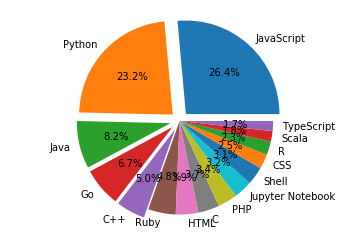

In [79]:
import matplotlib.pyplot as plt

lang = [x[0] for x in languages_score_sorted[1:16]]
freq = [x[1] for x in languages_score_sorted[1:16]]
explode = [0]*len(languages_score_sorted[1:16])
for i in range(5):# only "explode" the first 5 slices
    explode[i] = 0.1
    
fig1, ax1 = plt.subplots()
ax1.pie(freq, explode=explode, labels=lang, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 4.3. Connectivity

A directed graph is said to be **weakly** connected if there is a **path** between every pair of nodes in a graph.<br>
A directed graph is said to be **strongly** connected if there is a **directed path** between every pair of nodes in a graph.

In [33]:
print nx.is_weakly_connected(G1)
print len(list(nx.weakly_connected_component_subgraphs(G1)))
print nx.is_strongly_connected(G1)

True
1
False


## 4.4. Popular Users
Idea: Centrality measures identify the important nodes in a network. Each centrality measure quantifies the importance in a different way

As I have processed only a few stargazers in the network, let us make subgraph with only the user nodes that have degree > 1.

In [15]:
user_nodes = [node for node in G1.nodes() if G1.node[node]['type'] == 'user' and G1.out_degree(node) > 1]
H = G1.subgraph(user_nodes)
print nx.info(H)

Name: 
Type: SubDiGraph
Number of nodes: 813
Number of edges: 1308
Average in degree:   1.6089
Average out degree:   1.6089


### 4.4.1. Degree Centrality
The assumption of important nodes have many connections is made here.

In [16]:
dc_nodes = nx.degree_centrality(H)
dc_nodes_sorted = sorted(dc_nodes.items(), key = lambda x:x[1], reverse=True)
print dc_nodes_sorted[:10]

[(u'angusshire', 0.26108374384236455), (u'josephmisiti', 0.13423645320197045), (u'clarecorthell', 0.08374384236453201), (u'sdogruyol', 0.06403940886699508), (u'ibrahimgunduz34', 0.04926108374384237), (u'erolrecep', 0.04926108374384237), (u'jonathan-bower', 0.04926108374384237), (u'hmert', 0.04926108374384237), (u'RichardLitt', 0.04187192118226601), (u'Ardakilic', 0.04187192118226601)]


### 4.4.2. Betweeness Centrality
The assumption of important nodes have connect other nodes is made here.

In [17]:
bc_nodes = nx.betweenness_centrality(H)
bc_nodes_sorted = sorted(bc_nodes.items(), key = lambda x:x[1], reverse=True)
print bc_nodes_sorted[:10]

[(u'bahattincinic', 0.003715609895757557), (u'sly01', 0.0027998475054958256), (u'muraty', 0.0025828963716568246), (u'sdogruyol', 0.0022995810244569605), (u'erolrecep', 0.0018606369882010257), (u'smtaydemir', 0.0018147539359682438), (u'kurtulusahmet', 0.001704583554725233), (u'halidaltuner', 0.0016112726536821346), (u'ibrahimgunduz34', 0.0015219555334538362), (u'Ardakilic', 0.0012694680524224118)]


### 4.4.3. Closeness Centrality
The assumption of important nodes close to each other is made here.

In [18]:
cc_nodes = nx.closeness_centrality(H)
cc_nodes_sorted = sorted(cc_nodes.items(), key = lambda x:x[1], reverse=True)
print cc_nodes_sorted[:10]

[(u'josephmisiti', 0.1602312119553499), (u'ionelmc', 0.11593103448275863), (u'mher', 0.09075620234085945), (u'clarecorthell', 0.0847728811758926), (u'sdogruyol', 0.0828735051959129), (u'bahattincinic', 0.07150366454403459), (u'ibrahimgunduz34', 0.07085559507686813), (u'Ardakilic', 0.07064217460976913), (u'smtaydemir', 0.0677838207238247), (u'hkulekci', 0.06407978680449002)]


## 4.5. Community Detection
Community in a social network is the sub network with more intra connectivity and less inter connectivty with other communities.<br>
**Girvan Newman algorithm** is used to detect the communities in a network. It is based on *edge betweenness*. The edges which are connecting two communities tend to have high betweenness. The algorithms detect communities by repeatedly removing the edges with high betweenness.

Let us use this community detection concept to form more than 200 groups.

In [46]:
def edge_to_remove(G):
    eb_cent = nx.edge_betweenness_centrality(G) #Key-edges as tuple ;Value-edge betweeness
    eb_cent_items = eb_cent.items()#list has tuples, tuple has the above data
    eb_cent_items.sort(key = lambda x:x[1], reverse = True) #Descending order
    return eb_cent_items[0][0] #(a, b) #edge with max edge betweenness

def girvan(G):
    Gc = G.copy()
    # Returns connected components as subgrahs
    components = list(nx.weakly_connected_component_subgraphs(Gc))
    n_components = len(components)
    print 'The number of connected components are ', n_components
    while n_components < 200:
        Gc.remove_edge(*edge_to_remove(Gc)) # ((a, b)) -> (a, b)
        components = list(nx.weakly_connected_component_subgraphs(Gc))
        n_components = len(components)
        print 'The number of connected components are ', n_components
    return components

In [47]:
communities = girvan(H)
for community in communities: #i is a graph
    print community.nodes()
    print "Number of users : ", community.number_of_nodes()
    print "-"*100

The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected components are  176
The number of connected componen

In [64]:
from collections import Counter
sizes = [community.number_of_nodes() for community in communities]
for (size, count) in Counter(sizes).items():
    print "{} group(s) have {} user(s)".format(count, size)

196 group(s) have 1 user(s)
1 group(s) have 610 user(s)
1 group(s) have 3 user(s)
2 group(s) have 2 user(s)


As the data we used is a small sample and because of the process limiting due to computational dependencies, many of these 200 groups has only 1 user. This may not be the case when we work with the entire data.

# 4.6 XXX
This space is for you. Analyze and write on the comment section. Enjoy exploring! 

# Bonus: Graph Visualization

NetworkX provides basic functionality for visualizing graphs. I highly recommend you to explore the fully featured graph visualization tools like Cytospace, Gephi and GraphViz.To use other tools, export the graph into the suitable format(like we did in snapshotting the graph) and visualize it. 

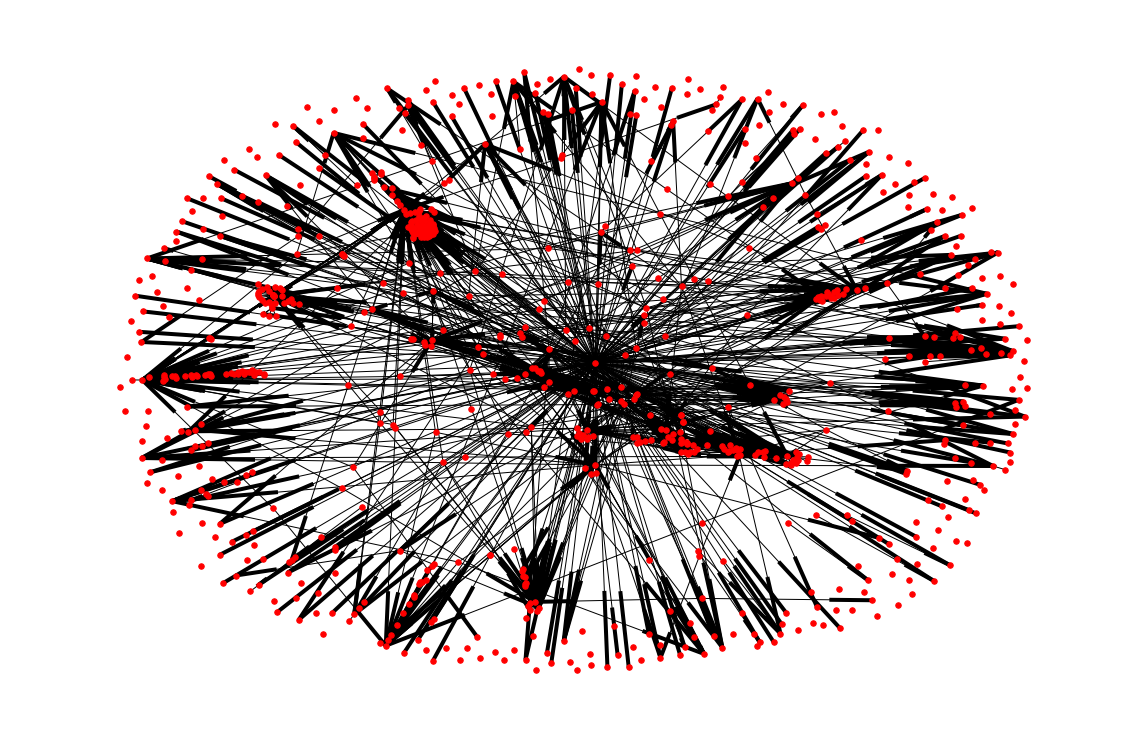

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(H, with_labels=False, node_size=30)
plt.show()

# End Notes

So this is all about collecting data and deriving insights from the GitHub social network. This is just a sample application and we can do a lot of exploration from this data. If you feel that I have missed any important part, please feel free to comment it. 

Yes, you've learned a new thing today. It is the time to give feedback. Enjoy learning! :)